# Grover's Algorithm: Quantum Search

## The Algorithm

$\newcommand{\bra}[1]{\left<#1\right|}$
$\newcommand{\ket}[1]{\left|#1\right>}$
Take a Hilbert space with $n$ qubits. We are given an oracle $O$ 

$$
O = \mathbf{1} - 2\ket{\omega}\bra{\omega}
$$

such that

\begin{aligned}
O \ket{w} &= - \ket{w} \quad  &&\text{for some } \omega \in [0,2^n-1] \text{ not previously known} \\
O \ket{x} &= \ket{x} \quad &&x \ne \omega 
\end{aligned}

Here, $x$ is the decimal representation of a $n$-bit string, i.e. $\ket{13}=\ket{0\dots 01101}$. 



We see that the oracle simply acts as unity for all but one special state $\ket{\omega}$ for which is adds a phase of $\pi$. 

How can we find out what the special state $\ket{\omega}$ is? One way is to try all possible states, but this requires $2^n-1$ operations in the worst case. We will see that, quantum-mechanically, we can do much better!

For a start, we will consider the equal-weight superposition of all possible states

$$
\ket{s} =  H^{\otimes n} \ket{0} = \frac{1}{\sqrt{N}} \left( \ket{0} + \ket{1} + \dotsc + \ket{\omega} + \dotsc + \ket{N-1} \right) \,.
$$

> ***Exercise X.*** Compute the overlap $\left<\omega|s\right>$. We will denote this overlap as $\theta/2=\left<\omega|s\right>$.

If we act with the oracle on $\ket{s}$, we get

$$
O \ket{s} = \frac{1}{\sqrt{N}} \left( \ket{0} + \ket{1} + \dotsc - \ket{\omega} + \dotsc + \ket{N-1} \right) \,.
$$

This state already knows about $\omega$ although we have performed only a single operation. The hard part will now be to extract this information with a measurement.

To make progress, we will introduce another operator, the so-called Grover operator

$$
G = 2\ket{s}\bra{s} - \mathbf{1} \,.
$$

$G$ makes no reference to $\omega$. It is therefore straightforward to implement this operation and in fact you will do so in the second part of this assignment.

> ***Exercise X.*** Show that $$ G = 2\ket{s}\bra{s} - \mathbf{1} = H^{\otimes n} \left(2\ket{0}\bra{0} - \mathbf{1}\right)H^{\otimes n}$$

Grover's algorithm is now given by the quantum circuit below. We will discuss each step in detail in terms of a geometric picture.

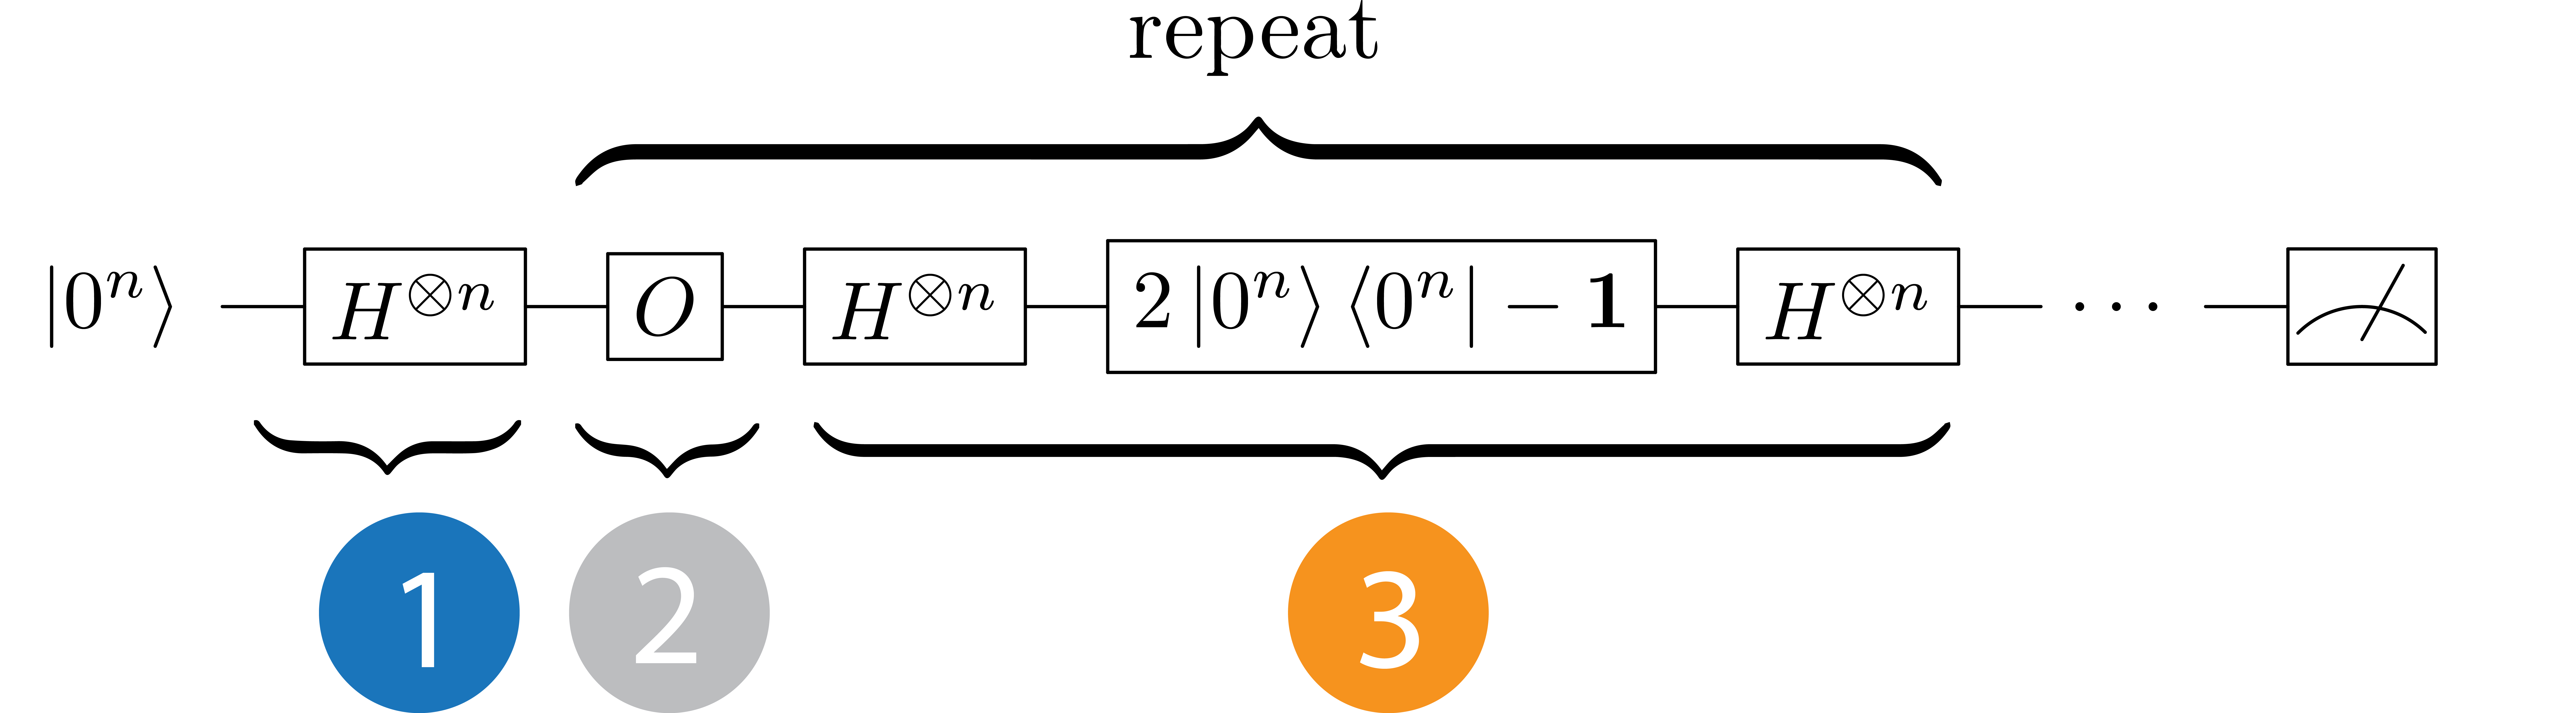

## A Geometric picture

A very beautiful and intuitive discussion relies on a geometric picture. Let us define the state

$$
\ket{\bar{s}} = \frac{1}{\sqrt{N-1}}\sum_{x\ne\omega}\ket{x} = \frac{1}{\sqrt{N-1}} \left( \ket{0} + \ket{1} + \dotsc + \ket{\omega-1} + \ket{\omega+1} + \dotsc + \ket{N-1} \right) \,.
$$

This state is obtained by simply removing the $\ket{\omega}$ contribution from $\ket{s}$. Naturally, $\ket{\bar{s}}$ is orthogonal to $\ket{\omega}$.

Consider the circle of states defined by

$$
\ket{\alpha} = \cos \alpha \ket{\bar{s}} + \sin \alpha \ket{\omega}
$$

We will represent each state by a vector on the unit sphere rotated by an angle $\alpha$. This picture is different from the Bloch sphere in two important ways: First, only one parameter $\alpha$ is used instead of two. This is because we have restricted ourselves to real amplitudes. Second, orthogonal states correspond to perpendicular vectors in our case while orthogonal states in the Pauli sphere point in opposite directions along the same axis.

The equal-weight superposition 
$$
\ket{s} = \cos \frac{\theta}{2} \ket{\bar{s}} + \sin \frac{\theta}{2} \ket{\omega}
$$ 

that we have previously defined is just one of the states on this circle. Together with 

$$\ket{\bar{\omega}} = \cos \frac{\theta}{2} \ket{\omega} - \sin \frac{\theta}{2} \ket{\bar{s}}
$$

it forms a different basis:

$$
\ket{\alpha}  = \cos \alpha \ket{\bar{s}} + \sin \alpha \ket{\omega}= \cos\left( \alpha-\frac{\theta}{2}\right) \ket{s} + \sin \left( \alpha-\frac{\theta}{2}\right) \ket{\bar{\omega}} 
$$

How is this geometrical picture useful? You will be able to answer this question yourself after going through the following three exercises.

> ***Exercise X.*** Argue or show explicitly that acting with $G$ or $O$ on a state $\ket{\alpha}$ produces another state on this circle $\ket{\alpha'}$.

This means that we can describe our problem with two states instead of considering the $2^n$-dimensional Hilbert-space. The operators $O$ and $G$ have now the following geometric interpretations.


> ***Exercise X.*** Show that $O\ket{\alpha}$ corresponds to a reflection of $\ket{\alpha}$ across the $\ket{\bar{s}}$-axis and that $G\ket{\alpha}$ corresponds to a reflection of $\ket{\alpha}$ across the $\ket{s}$-axis.

> ***Exercise X.*** Given a state $\ket{\alpha}$ show that $GO\ket{\alpha}=\ket{\alpha+\theta}$. You may use the graphic below to derive this point.

With all these ingredients, it is now straightforward to understand Grover's quantum circuit. Step by step:

1. We create the state $\ket{s}$ that corresponds to a vector at angle $\theta/2$.


2. We repeatedly apply $GO$. Each time our vector is rotated counter-clockwise by an angle $\theta$.


3. After a certain number of iterations, our state points along the $\ket{\omega}$-axis (or at least very close to it). A measurement of our state will now reveal $\omega$.


> ***Exercise X.*** How many Grover steps (application of $GO$) are necessary to find $\omega$ with maximum probability? How does this compare to the brute-force solution of trying all possible $\ket{x}$ one-by-one?

Here you have it! Grover's algorithm gives an exponential speedup compared to the classical solution of checking each state one by one.

We can of course translate our two-state geometrical picture to a description of the full $n$-qubit quantum state. The amplitudes of this state in the computational basis are shown below for various Grover steps.

In [141]:
from IPython.display import display, HTML
display(HTML("""<div id="observablehq-d6ca94fd"></div><script type="module">import {Runtime, Inspector} from "https://cdn.jsdelivr.net/npm/@observablehq/runtime@4/dist/runtime.js";import define from "https://api.observablehq.com/@rafaelha/grovers-algorithm-4.js?v=3";const inspect = Inspector.into("#observablehq-d6ca94fd");(new Runtime).module(define, name => (name === "chart" || name === "viewof n" || name === "viewof grover_steps") && inspect());</script>"""))

# A Quantum Circuit Implementation of Grover's Algorithm

We will now implement Grover's algorithm with the `pennylane` framework and run it on a quantum simulator. We begin by importing some python packages.

In [278]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

Next we define the number of qubits `n` and `grover_steps`. Use these parameters in your implementation and feel free to change them.

In [299]:
n = 5 # number of qubits
grover_steps = 6 # number of grover steps
w = np.random.randint(0,2**n) # the oracle's secret. Don't peak!

> ***Exercise X.*** Your turn! Complete the function `grover()` to implement the Grover operator
>
> $$ G = 2\ket{s}\bra{s} - \mathbf{1} = H^{\otimes n} \left(2\ket{0}\bra{0} - \mathbf{1}\right)H^{\otimes n}$$
>
> You might find the following quantum circuit (from Nielsen & Chuang) useful. It makes use of the [Toffoli](https://en.wikipedia.org/wiki/Toffoli_gate) gate. This gates applies $X$ to the target qubit only if both control qubits are in the $\ket{1}$ state. In `pennylane` this gate is implemented using `qml.Toffoli(wires=[ctrl1,ctrl2,tar])`. Note you will need more than $2n$ qubits to implement the oracle in this way. These $n$ additional qubits are referred to as *ancillas* or *work qubits*.

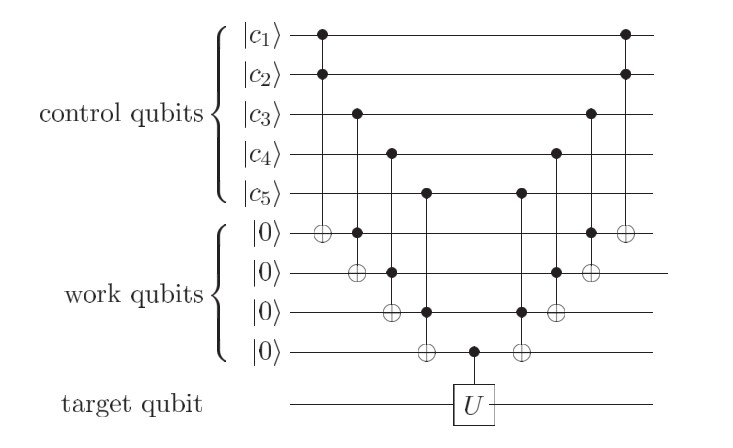

In [300]:
def grover():
    # solution
    qml.PauliX(2*n-1)
    qml.Hadamard(2*n-1)
    for i in range(n):
        qml.Hadamard(i)
        
    for i in range(n):
        qml.PauliX(i)
    
    qml.Toffoli(wires=[0,1,n])
    for i in np.arange(n-2):
        qml.Toffoli(wires=[i+2,n+i,n+i+1])
    qml.CNOT(wires=[2*n-2,2*n-1])
    
    for i in np.flip(np.arange(n-2)):
        qml.Toffoli(wires=[i+2,n+i,n+i+1])
    qml.Toffoli(wires=[0,1,n])
    
    for i in range(n):
        qml.PauliX(i)
    
    for i in range(n):
        qml.Hadamard(i)
        
    qml.Hadamard(2*n-1)
    qml.PauliX(2*n-1)

The code below implements the quantum oracle.

In [301]:
def encode_w():
    for idx, b in enumerate(np.binary_repr(w,n)):
        if not int(b):
            qml.PauliX(idx)      
def oracle():
    qml.PauliX(2*n-1)
    qml.Hadamard(2*n-1)
    encode_w()
    qml.Toffoli(wires=[0,1,n])
    for i in np.arange(n-2):
        qml.Toffoli(wires=[i+2,n+i,n+i+1])
    qml.CNOT(wires=[2*n-2,2*n-1])
    
    for i in np.flip(np.arange(n-2)):
        qml.Toffoli(wires=[i+2,n+i,n+i+1])
    qml.Toffoli(wires=[0,1,n])
    encode_w()
    qml.Hadamard(2*n-1)
    qml.PauliX(2*n-1)
    

Finally, we select the `defaul.qubit` simulator as our quantum device.

In [302]:
dev = qml.device('default.qubit', wires=2*n)

And we combine all parts into a quantum circuit.

In [303]:
@qml.qnode(dev)
def circuit():
    # step 1
    for i in range(n):
        qml.Hadamard(i)
        
    for i in np.arange(grover_steps):
        oracle() # step 2
        grover() # step 3
    
    return qml.probs(wires=range(n)) # return probabilities corresponding to measurement outcomes in z-basis

If your implementation is correct and if you have chosen the right number of Grover steps, the outcome with the highest probability will tell you what `w` is!

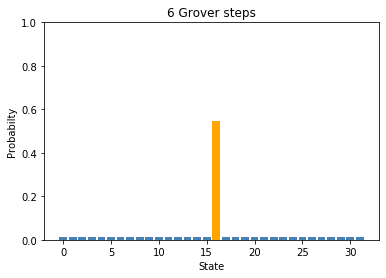

In [304]:
probs = circuit()
color = ['steelblue']*2**n
color[w] = 'orange'
plt.bar(np.arange(0,2**n),probs,color=color)
plt.title(str(grover_steps) + ' Grover steps')
plt.xlabel('State');
plt.ylabel('Probabilty');
plt.ylim(0,1);